The Quandl Python package is free to use and grants access to all free databases. If you would like to make more than 50 calls a day, however, you will need to create a free Quandl account and set your API key.


https://www.quandl.com/tools/python

pip3 install quandl

In [1]:
%matplotlib inline
import quandl
import json

def load_api_secrets(filename):
    """Convenience to load the API key from a json file."""
    try:
        with open(filename, 'r') as fp:
            api_params = json.load(fp)
    except Exception as e:
        print('Failed to load API secrets key: {}'.format(e))
        api_params = None
    return api_params['key']

In [2]:
API_key_filepath = '/Users/robincole/Desktop/Quandl_API_key.json'
API_key = load_api_secrets(API_key_filepath)
#API_key

In [3]:
quandl.ApiConfig.api_key = API_key

## Time-Series Format

In [4]:
#This call gets the WTI Crude Oil price from the US Department of Energy:

mydata = quandl.get("EIA/PET_RWTC_D")

#Note that you need to know the "Quandl code" of each dataset you download. In the above example, it is "EIA/PET_RWTC_D".

In [5]:
mydata.head()  # quandl.get returns a dataframe

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


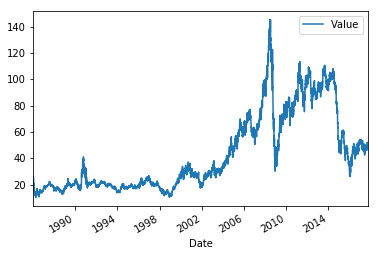

In [6]:
mydata.plot()

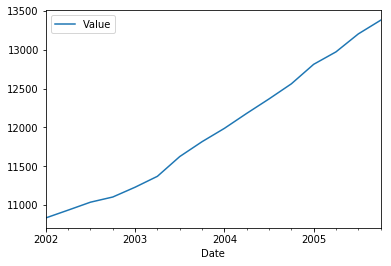

In [7]:
#To set start and end dates:

quandl.get("FRED/GDP", start_date="2001-12-31", end_date="2005-12-31").plot()

In [8]:
#To request specific columns:

quandl.get(["NSE/OIL.1", "WIKI/AAPL.4"]).head()

,NSE/OIL - Open,WIKI/AAPL - Close
Date,,
1980-12-12,NaN,28.75
1980-12-15,NaN,27.25
1980-12-16,NaN,25.25
1980-12-17,NaN,25.87
1980-12-18,NaN,26.63


In [9]:
#To request the last n rows:

print(quandl.get("WIKI/AAPL", rows=5))

              Open    High     Low   Close      Volume  Ex-Dividend  \
Date                                                                  
2017-10-16  157.90  160.00  157.65  159.88  23894630.0          0.0   
2017-10-17  159.78  160.87  159.23  160.47  18816438.0          0.0   
2017-10-18  160.42  160.71  159.60  159.76  16158659.0          0.0   
2017-10-19  156.75  157.08  155.02  155.98  42111326.0          0.0   
2017-10-20  156.61  157.75  155.96  156.16  23612246.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2017-10-16          1.0     157.90     160.00    157.65      159.88   
2017-10-17          1.0     159.78     160.87    159.23      160.47   
2017-10-18          1.0     160.42     160.71    159.60      159.76   
2017-10-19          1.0     156.75     157.08    155.02      155.98   
2017-10-20          1.0     156.61     157.75    155.96      156.16   

    

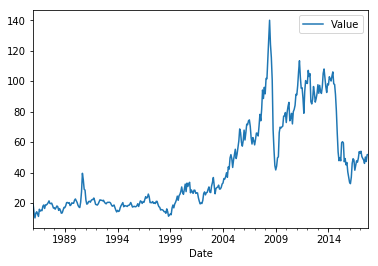

In [10]:
#To change the sampling frequency:

quandl.get("EIA/PET_RWTC_D", collapse="monthly").plot()

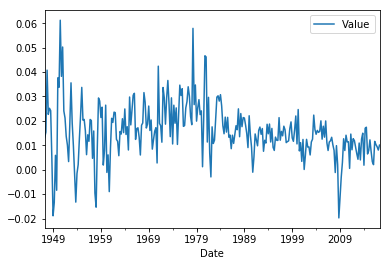

In [11]:
#To perform elementary calculations on the data:

quandl.get("FRED/GDP", transformation="rdiff").plot()

## Datatables

In [12]:
#This example retrieves all rows for ZACKS/FC where ticker='AAPL'.

quandl.get_table('ZACKS/FC', ticker='AAPL').head()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,stock_based_compsn_qd,cash_flow_oper_activity_qd,net_change_prop_plant_equip_qd,comm_stock_div_paid_qd,pref_stock_div_paid_qd,tot_comm_pref_stock_div_qd,wavg_shares_out,wavg_shares_out_diluted,eps_basic_net,eps_diluted_net
None,,,,,,,,,,,,,,,,,,,,,
0,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2011-09-30,A,None,2011,...,NaN,NaN,NaN,NaN,None,NaN,6469.806,6556.515,4.0071,3.9543
1,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2012-09-30,A,None,2012,...,NaN,NaN,NaN,NaN,None,NaN,6543.726,6617.483,6.3800,6.3100
2,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2013-09-30,A,None,2013,...,NaN,NaN,NaN,NaN,None,NaN,6477.320,6521.634,5.7200,5.6800
3,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2014-09-30,A,None,2014,...,NaN,NaN,NaN,NaN,None,NaN,6085.572,6122.663,6.4900,6.4500
4,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2015-09-30,A,None,2015,...,NaN,NaN,NaN,NaN,None,NaN,5753.421,5793.069,9.2800,9.2200


Datatables can return large volumes of data due to their format. We recommend that you turn on pagination to return data page by page and to avoid exceeding call limits.
To turn on pagination:

In [13]:
quandl.get_table('ZACKS/FC', paginate=True).head()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,stock_based_compsn_qd,cash_flow_oper_activity_qd,net_change_prop_plant_equip_qd,comm_stock_div_paid_qd,pref_stock_div_paid_qd,tot_comm_pref_stock_div_qd,wavg_shares_out,wavg_shares_out_diluted,eps_basic_net,eps_diluted_net
None,,,,,,,,,,,,,,,,,,,,,
0,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2011-09-30,A,None,2011,...,NaN,NaN,NaN,NaN,None,NaN,6469.806,6556.515,4.0071,3.9543
1,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2012-09-30,A,None,2012,...,NaN,NaN,NaN,NaN,None,NaN,6543.726,6617.483,6.3800,6.3100
2,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2013-09-30,A,None,2013,...,NaN,NaN,NaN,NaN,None,NaN,6477.320,6521.634,5.7200,5.6800
3,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2014-09-30,A,None,2014,...,NaN,NaN,NaN,NaN,None,NaN,6085.572,6122.663,6.4900,6.4500
4,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2015-09-30,A,None,2015,...,NaN,NaN,NaN,NaN,None,NaN,5753.421,5793.069,9.2800,9.2200


In [15]:
#To request specific columns:

quandl.get_table('ZACKS/FC', paginate=True, ticker='AAPL', qopts={'columns': ['ticker', 'per_end_date']}).head()

,ticker,per_end_date
None,,
0,AAPL,2011-09-30
1,AAPL,2012-09-30
2,AAPL,2013-09-30
3,AAPL,2014-09-30
4,AAPL,2015-09-30


To filter based on column:

This returns the ticker and per_end_date columns for the tickers AAPL and MSFT for every per_end_date greater than 2015-01-01 from the ZACKS/FC datatable.

In [16]:
quandl.get_table('ZACKS/FC', paginate=True, ticker=['AAPL', 'MSFT'], per_end_date={'gte': '2015-01-01'}, qopts={'columns':['ticker', 'per_end_date']}).head()

,ticker,per_end_date
None,,
0,AAPL,2015-09-30
1,AAPL,2016-09-30
2,AAPL,2015-03-31
3,AAPL,2015-06-30
4,AAPL,2015-09-30
